In [12]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from pathlib import Path


In [13]:
model_lookup_name = "llama-3-70b-chat"
generation_objective="innovation_type"
topicgpt_path = Path("../../../topicGPT")
folder_path = f'{topicgpt_path}/data/output/{model_lookup_name}/{generation_objective}'
if not os.path.exists(folder_path):
    print('Files not found')

In [14]:
cont_file= "cont_generation_1.jsonl"
gen_file= "generation_1.jsonl"
gen_md_file= "generation_1.md"


In [15]:
# Fetch all data from the directory
cont_data = pd.read_json(os.path.join(folder_path, cont_file), lines=True)
generation_json_data = pd.read_json(os.path.join(folder_path, gen_file), lines=True)

generation_md_data=[]
with open(os.path.join(folder_path, gen_md_file)) as f:
    for line in f:
        generation_md_data.append(line)




Text(0.5, 1.0, 'Number of Topics Over Documents')

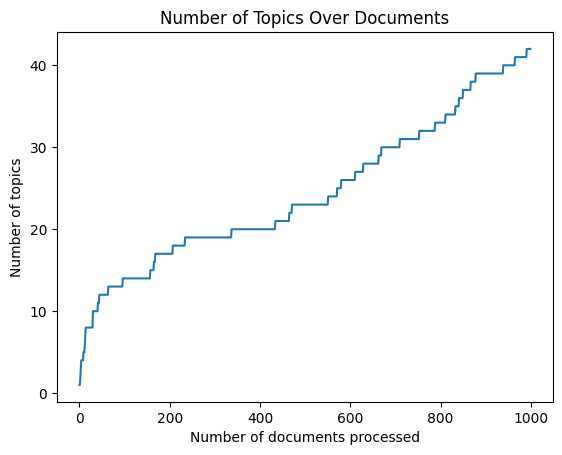

In [16]:
# Plot Number of Topics Over Documents
count_new=[]
count=0
for v in cont_data.topics:
    for topic in v:
        if topic['duplicate']==False:
            count=count+1
    count_new.append(count)
plt.plot(range(len(cont_data)), count_new)
plt.xlabel("Number of documents processed")
plt.ylabel("Number of topics")
plt.title("Number of Topics Over Documents")

In [17]:
resp=[]
for index, row in generation_json_data.iterrows():
    i=row['responses'].split('\n')
    dict_responses={}
    for ind,xml_string in enumerate(i):
        if re.match("Note:", xml_string):
            continue
        if re.match('\[[0-9]*\]',xml_string):
            xml_string=re.sub('\[[0-9]*\] ','',xml_string)
            try:
                # print(xml_string.split(':')[1])
                dict_responses[xml_string.split(':')[0]]=xml_string.split(':')[1].lstrip()

            except:
                # print('no desc found')
                dict_responses[xml_string.split(':')[0]]='NA'
    row['responses']=dict_responses

In [18]:
arr_count={}
for i,v in enumerate(generation_md_data):
    v=v.split()
    if v==[]:break
    for c,ind in enumerate(v):
        if re.search("Count",ind):
            break
    arr_count[i]=int(v[c+1].replace( "):", ""))
print(arr_count)


{0: 348, 1: 159, 2: 218, 3: 131, 4: 81, 5: 61, 6: 82, 7: 18, 8: 7, 9: 125, 10: 128, 11: 49, 12: 48, 13: 19, 14: 25, 15: 26, 16: 4, 17: 4, 18: 15, 19: 86, 20: 1, 21: 1, 22: 6, 23: 9, 24: 17, 25: 8, 26: 2, 27: 3, 28: 15, 29: 3, 30: 6, 31: 12, 32: 1, 33: 3, 34: 3, 35: 2, 36: 1, 37: 2, 38: 1, 39: 1, 40: 1, 41: 1}


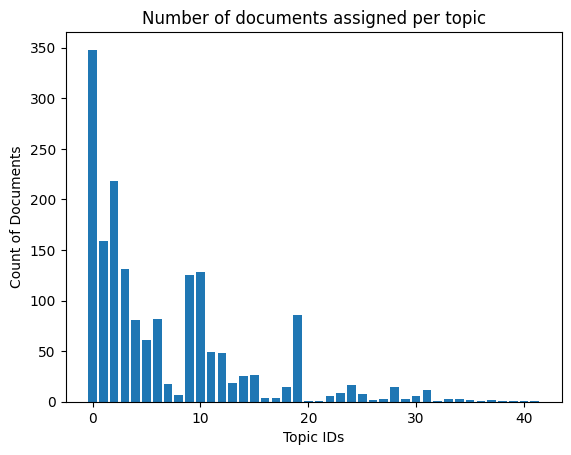

In [19]:
plt.bar(list(arr_count.keys()), list(arr_count.values()))
plt.xlabel("Topic IDs")
plt.ylabel("Count of Documents")
plt.title("Number of documents assigned per topic")
plt.show()

In [20]:
arr_count_sorted= sorted(arr_count.items(), key=lambda x: x[1], reverse=True)
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(arr_count_sorted)

[(0, 348),
 (2, 218),
 (1, 159),
 (3, 131),
 (10, 128),
 (9, 125),
 (19, 86),
 (6, 82),
 (4, 81),
 (5, 61),
 (11, 49),
 (12, 48),
 (15, 26),
 (14, 25),
 (13, 19),
 (7, 18),
 (24, 17),
 (18, 15),
 (28, 15),
 (31, 12),
 (23, 9),
 (25, 8),
 (8, 7),
 (22, 6),
 (30, 6),
 (16, 4),
 (17, 4),
 (27, 3),
 (29, 3),
 (33, 3),
 (34, 3),
 (26, 2),
 (35, 2),
 (37, 2),
 (20, 1),
 (21, 1),
 (32, 1),
 (36, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1)]


In [21]:
count =0
dict_count={}
for i in arr_count_sorted:
    dict_count[i[1]]=dict_count.get(i[1],0)+1
    if i[1]==2:
        count=count+1
        # print(i)
print(dict_count)

{348: 1, 218: 1, 159: 1, 131: 1, 128: 1, 125: 1, 86: 1, 82: 1, 81: 1, 61: 1, 49: 1, 48: 1, 26: 1, 25: 1, 19: 1, 18: 1, 17: 1, 15: 2, 12: 1, 9: 1, 8: 1, 7: 1, 6: 2, 4: 2, 3: 4, 2: 3, 1: 8}


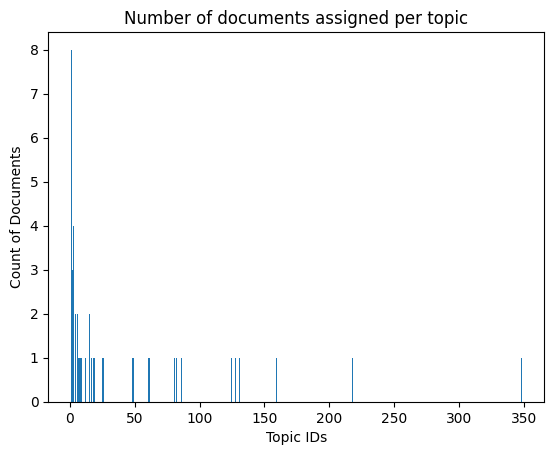

In [22]:
plt.bar(list(dict_count.keys()), list(dict_count.values()))
plt.xlabel("Topic IDs")
plt.ylabel("Count of Documents")
plt.title("Number of documents assigned per topic")
plt.show()

In [23]:
no_doc={}
for i,v in generation_json_data.iterrows():
    no_doc[len(v.responses)]=no_doc.get(len(v.responses),0)+1
print(no_doc)

{1: 520, 2: 282, 3: 163, 9: 1, 5: 6, 12: 2, 4: 23, 14: 1, 19: 1, 16: 1}


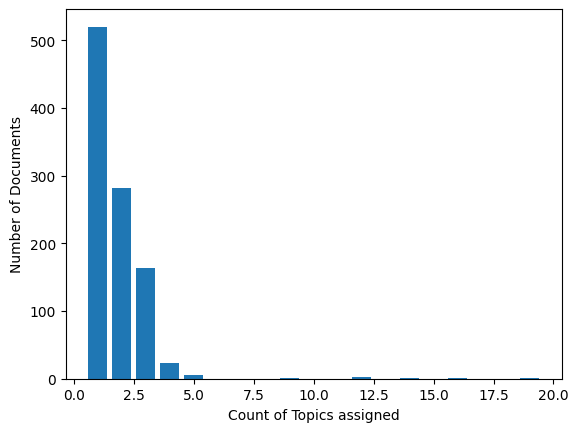

In [24]:
plt.bar(list(no_doc.keys()), list(no_doc.values()))
plt.xlabel("Count of Topics assigned")
plt.ylabel("Number of Documents")
plt.show()